# Feature Evaluations

This is when you can include other features of your text that you think may indicate what the text is e.g:
- Length of message
- Percentage of punctuation 
- Percentage of capitalisation

It may be useful to do power transformations e.g. square, square root. This helps the model to not to try too hard to overfit for outliers.

## Read in text 

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

## Create text message length feature

In [2]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


## Create feature for % of text that is punctuation 

In [3]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


# Evaluate created features

See if this feature is helpful by showing it on overlayed histograms.

In [6]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


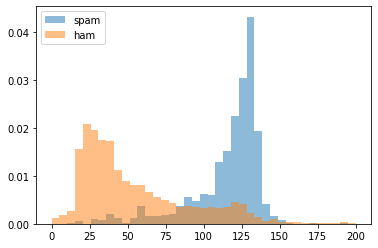

In [8]:
#Length of passage

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc='upper left')
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


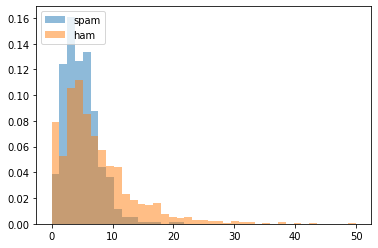

In [9]:
#Percentage of pucntuation

bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc='upper left')
pyplot.show()

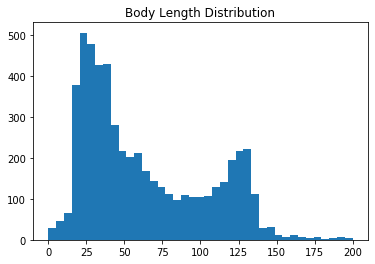

In [13]:
bins = np.linspace(0,200,40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

#Not a good graph for a transformation as is bimodal


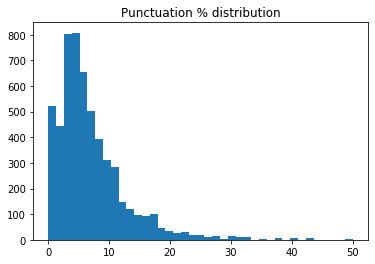

In [14]:
bins = np.linspace(0,50,40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % distribution")
pyplot.show()

#Good feature to transform as there are many with higher points

# Box-Cox Power Transformations

1. Determine range of exponents (normally -2 to 2)
2. Apply each transformation to each value of chosen feature
3. Use some criteria to determine which transformation gave best distribution

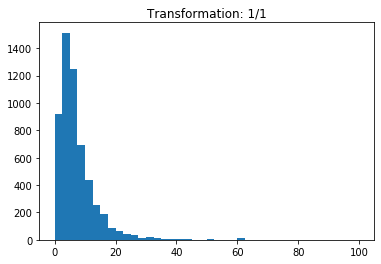

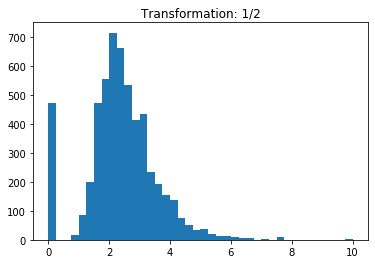

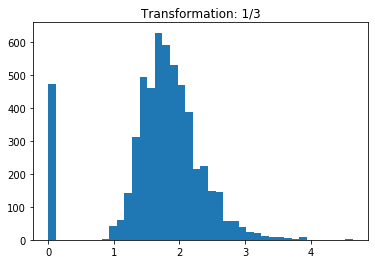

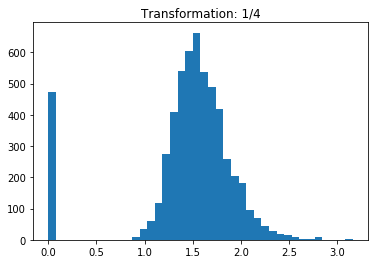

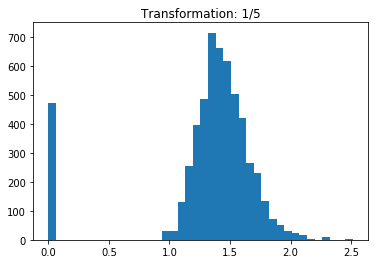

In [22]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()